In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df_jednostki = pd.read_csv('dane/_jednostki.csv', sep=';')
df_jednostki.okręgi = [ o.replace(' ', '_') for o in df_jednostki.okręgi ]
df_jednostki.województwo = [ w.upper() for w in df_jednostki.województwo ]
df_jednostki

,nr,okręgi,powiaty,województwo
0,1,Legnica,"powiaty: bolesławiecki, głogowski, jaworski, j...",DOLNOŚLĄSKIE
1,2,Wałbrzych,"powiaty: dzierżoniowski, kłodzki, świdnicki, w...",DOLNOŚLĄSKIE
2,3,Wrocław,"powiaty: górowski, milicki, oleśnicki, oławski...",DOLNOŚLĄSKIE
3,4,Bydgoszcz,"powiaty: bydgoski, inowrocławski, mogileński, ...",KUJAWSKO-POMORSKIE
4,5,Toruń,"powiaty: aleksandrowski, brodnicki, chełmiński...",KUJAWSKO-POMORSKIE
5,6,Lublin,"powiaty: janowski, kraśnicki, lubartowski, lub...",LUBELSKIE
6,7,Chełm,"powiaty: bialski, biłgorajski, chełmski, hrubi...",LUBELSKIE
7,8,Zielona_Góra,województwo lubuskie,LUBUSKIE
8,9,Łódź,powiaty: brzeziński i łódzki wschodni; miasto ...,ŁÓDZKIE
9,10,Piotrków_Trybunalski,"powiaty: bełchatowski, opoczyński, piotrkowski...",ŁÓDZKIE


In [3]:
features = [['155055', 'emeryci_i_rencisci'], #przeciętna liczba emerytów i rencistów ogółem (NUTS-2)
            ['33507', 'bezrobocie_zarejsestrowane'], #Bezrobotni zarejestrowani ogółem (P)
            ['10514', 'bezrobocie_zarejsestrowane_gminy'], #Bezrobotni zarejestrowani ogółem (G, 2003-)
            ['58', 'malzenstwa_zawarte'], # (G)
            ['60559', 'ludnosc_na_1km2'], #(G, 2002 -)
            ['76037', 'dochody_gminy'], # (G)
            ['76973','dochody_na_mieszkanca'], #(G, 2002-)
            ['479300', 'wyksztalcenie_wyzsze'], #(NUTS 2)   Odsetek ludności w wieku 15-64 lata z wykształceniem wyższym wg płci i miejsca zamieszkania - różnica w stosunku do średniej krajowej (p.proc.) 
            ['478931', 'wyksztalcenie_gim_pod_nizsze'], #(NUTS 2)   Odsetek ludności w wieku 15-64 lata z wykształceniem wyższym wg płci i miejsca zamieszkania - różnica w stosunku do średniej krajowej (p.proc.) 
            ['478929', 'wyksztalcenie_srednie' ], #(NUTS 2)  średnie (łącznie ze średnim zawodowym i ogólnokształcącym); Odsetek ludności w wieku 15-64 lata z wykształceniem wyższym wg płci i miejsca zamieszkania - różnica w stosunku do średniej krajowej (p.proc.)            
            ['35039', 'rozwody_powiat'], # (P)
            ['60567', 'udzial_wiek_przedprodukcyjny'], # (G, 2002 -) Udział ludności wg ekonomicznych grup wieku w % ludności ogółem, przedprodukcyjny
            ['60566', 'udzial_wiek_produkcyjny'], # (G, 2002 -) produkcyjny
            ['60565', 'udzial_wiek_poprodukcyjny'], # (G, 2002 -) postprodukcyjny
            ['216969', 'praca_najemna'], # (NUTS 2) Przeciętny miesięczny dochód rozporządzalny na 1 osobę"
            ['216971', 'praca_wlasny_rachunek'], # (NUTS 2) 
            ['519999', 'socjal_500plus'], # (NUTS 2, 2016 -) 
            ['216972', 'socjal'], # (NUTS 2)
            ['458417', 'dochody_brutto_na_mieszkanca'], # (NUTS 2) dochody do dyspozycji brutto na 1 mieszkańca
            ['458421', 'PKB_na_1_mieszkanca'],  # (NUTS 2)
            ['58559', 'przestepstwa_ogolem'] # (NUTS 3, powiaty, 2002 -)
            ]

In [4]:
emeryci_i_rencisci = pd.read_csv("dane/"+"emeryci_i_rencisci"+".csv", sep=',')
emeryci_i_rencisci_2005 = emeryci_i_rencisci[['jednostka', '2001' , '2002', '2003', '2004']]
emeryci_i_rencisci_2005.columns = ['jednostka', 'eir_2001' , 'eir_2002', 'eir_2003', 'eir_2004']
emeryci_i_rencisci_2005

,jednostka,eir_2001,eir_2002,eir_2003,eir_2004
0,POLSKA,9310738.0,9236784.0,9206126.0,9212262.0
1,MAŁOPOLSKIE,800306.0,783214.0,773596.0,768948.0
2,ŚLĄSKIE,1144639.0,1139050.0,1141867.0,1148448.0
3,LUBUSKIE,234017.0,230793.0,228805.0,228222.0
4,WIELKOPOLSKIE,785888.0,777559.0,772510.0,768409.0
5,ZACHODNIOPOMORSKIE,356734.0,358534.0,359851.0,361608.0
6,DOLNOŚLĄSKIE,688366.0,679217.0,675162.0,674851.0
7,OPOLSKIE,214393.0,214031.0,213771.0,214176.0
8,KUJAWSKO-POMORSKIE,469368.0,465129.0,464483.0,466143.0
9,POMORSKIE,440612.0,441224.0,442989.0,447179.0


In [5]:
wyniki_2005 = pd.read_csv("wyniki_wyborow/"+"2005_O"+".csv")
wyniki_2005['jednostka'] = [ w.replace('O_', '') for w in wyniki_2005['jednostka'] ]
wyniki_2005 = wyniki_2005.fillna(0)
wyniki_2005['PIS'] = wyniki_2005['Komitet Wyborczy Prawo i Sprawiedliwość']/(wyniki_2005['Komitet Wyborczy Prawo i Sprawiedliwość']+wyniki_2005['Komitet Wyborczy Platforma Obywatelska RP'])
wyniki_2005['PO'] = wyniki_2005['Komitet Wyborczy Platforma Obywatelska RP']/(wyniki_2005['Komitet Wyborczy Prawo i Sprawiedliwość']+wyniki_2005['Komitet Wyborczy Platforma Obywatelska RP'])
wyniki_2005 = wyniki_2005[['jednostka', 'PO', 'PIS']]
wyniki_2005

,jednostka,PO,PIS
0,Polska,0.472125,0.527875
1,Kalisz,0.518996,0.481004
2,Radom,0.378963,0.621037
3,Gdynia,0.549536,0.450464
4,Wałbrzych,0.538688,0.461312
5,Legnica,0.496381,0.503619
6,Gliwice,0.538049,0.461951
7,Katowice,0.523248,0.476752
8,Piotrków_Trybunalski,0.397202,0.602798
9,Sieradz,0.412917,0.587083


In [6]:
wyn_05 = wyniki_2005.merge(df_jednostki,how='outer',left_on=['jednostka'],right_on=['okręgi'])
wyn_05 = wyn_05[['jednostka', 'PO', 'PIS', 'województwo']]
wyn_05 = wyn_05.groupby('województwo').agg({'PO': np.mean, 'PIS': np.mean}).reset_index()
wyn_05

,województwo,PO,PIS
0,DOLNOŚLĄSKIE,0.530790,0.469210
1,KUJAWSKO-POMORSKIE,0.454183,0.545817
2,LUBELSKIE,0.375721,0.624279
3,LUBUSKIE,0.514617,0.485383
4,MAZOWIECKIE,0.361173,0.638827
5,MAŁOPOLSKIE,0.395179,0.604821
6,OPOLSKIE,0.541453,0.458547
7,PODKARPACKIE,0.306032,0.693968
8,PODLASKIE,0.348944,0.651056
9,POMORSKIE,0.578630,0.421370


In [7]:
wyn_05_eir = wyn_05 .merge(emeryci_i_rencisci_2005,how='inner',left_on=['województwo'],right_on=['jednostka'])
wyn_05_eir = wyn_05_eir.set_index('województwo').drop(['jednostka'], axis = 1)
wyn_05_eir

,PO,PIS,eir_2001,eir_2002,eir_2003,eir_2004
województwo,,,,,,
DOLNOŚLĄSKIE,0.530790,0.469210,688366.0,679217.0,675162.0,674851.0
KUJAWSKO-POMORSKIE,0.454183,0.545817,469368.0,465129.0,464483.0,466143.0
LUBELSKIE,0.375721,0.624279,591238.0,583287.0,576247.0,572526.0
LUBUSKIE,0.514617,0.485383,234017.0,230793.0,228805.0,228222.0
MAZOWIECKIE,0.361173,0.638827,1169706.0,1162884.0,1161704.0,1166887.0
MAŁOPOLSKIE,0.395179,0.604821,800306.0,783214.0,773596.0,768948.0
OPOLSKIE,0.541453,0.458547,214393.0,214031.0,213771.0,214176.0
PODKARPACKIE,0.306032,0.693968,500389.0,496365.0,493847.0,492628.0
PODLASKIE,0.348944,0.651056,287700.0,284768.0,283386.0,282145.0


In [8]:
corr = wyn_05_eir.corr()
corr.style.background_gradient(cmap='coolwarm')

,PO,PIS,eir_2001,eir_2002,eir_2003,eir_2004
PO,1,-1,-0.166713,-0.163148,-0.159146,-0.155614
PIS,-1,1,0.166713,0.163148,0.159146,0.155614
eir_2001,-0.166713,0.166713,1,0.999923,0.999742,0.999476
eir_2002,-0.163148,0.163148,0.999923,1,0.999941,0.99978
eir_2003,-0.159146,0.159146,0.999742,0.999941,1,0.999946
eir_2004,-0.155614,0.155614,0.999476,0.99978,0.999946,1


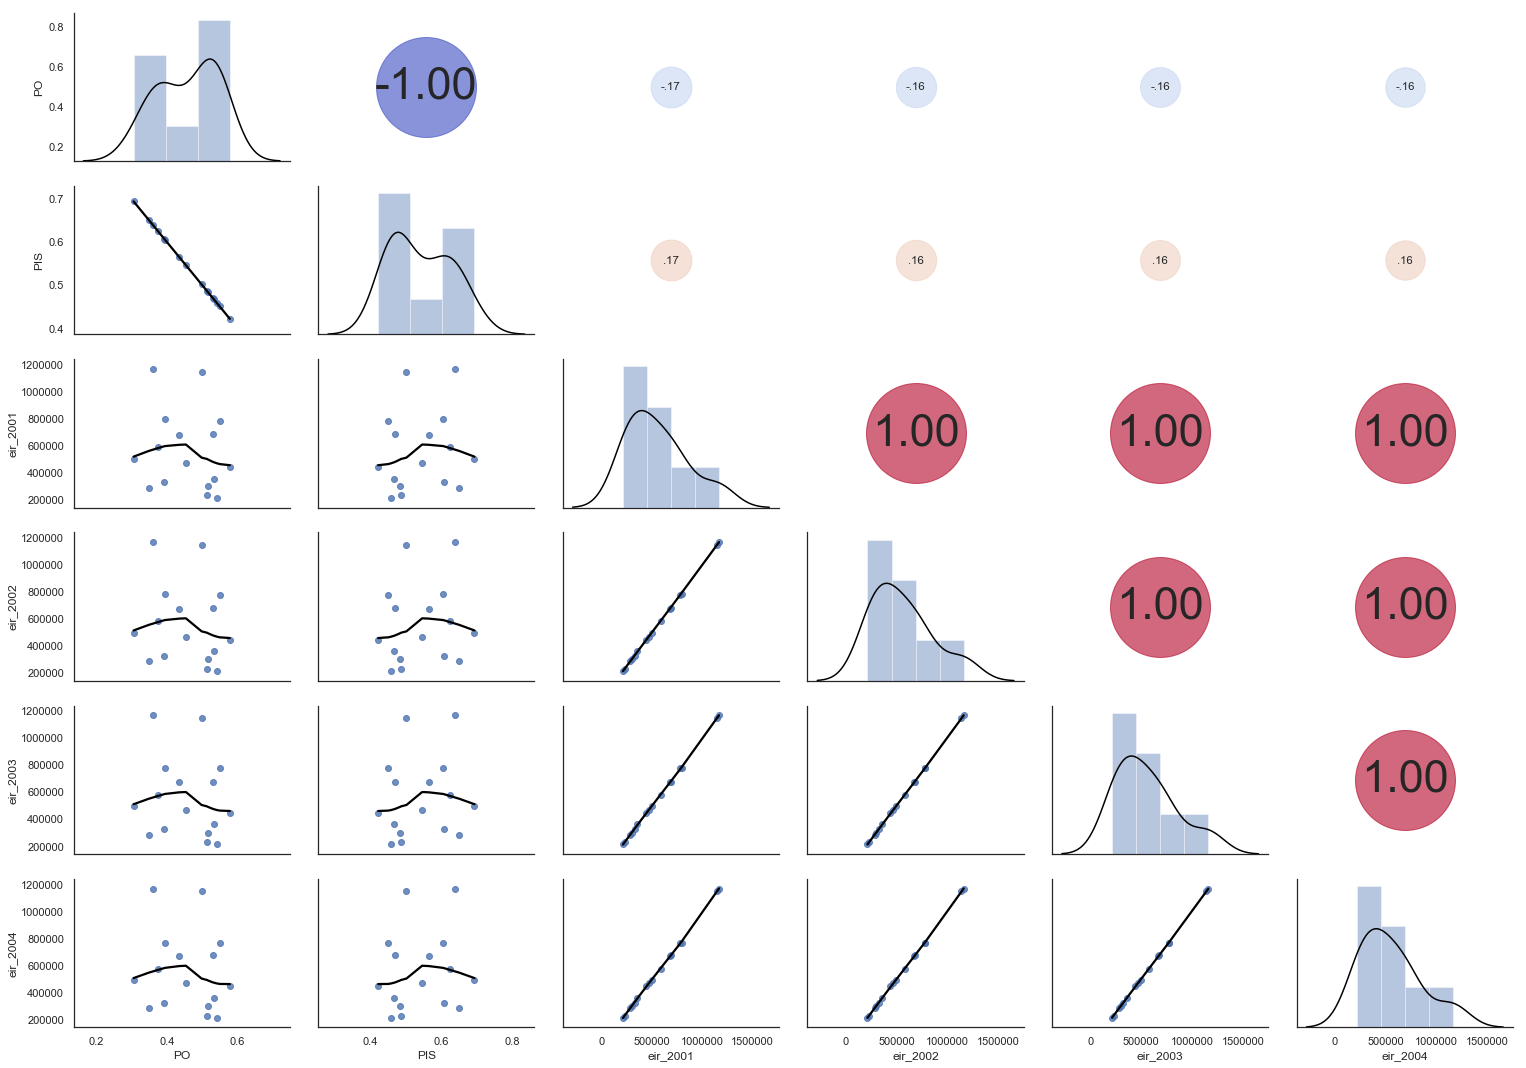

In [19]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1)
g = sns.PairGrid(wyn_05_eir, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)